<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Copie_de_Data_description_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

url_2020 = 'https://github.com/axellebersier/Urban_data_mining/raw/main/Data/c_2020_merged.xlsx'
df_2020 = pd.read_excel(url_2020, engine='openpyxl')



##Data Description 2020

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             2075 non-null   int64         
 1   p_surf_transport               2075 non-null   float64       
 2   net_income_h                   2075 non-null   float64       
 3   s_infrastructure               2075 non-null   int64         
 4   s_forested                     2075 non-null   int64         
 5   s_agriculture                  2075 non-null   int64         
 6   s_improductible                2075 non-null   int64         
 7   natural_growth                 2075 non-null   int64         
 8   Population                     2075 non-null   int64         
 9   dependency_ratio               2075 non-null   float64       
 10  migration_intern               2075 non-null   float64       
 11  migration        

In [4]:
df_2020.describe()

,ID,p_surf_transport,net_income_h,s_infrastructure,s_forested,s_agriculture,s_improductible,natural_growth,Population,dependency_ratio,...,size_households,new_entreprise,swiss_nationality_acquisition,n_wedding,n_strangers,cultural_place,p_individual_houses,no_mut_nvlle_cmne,no_mut_ancienne_cmne,new_no_commune
count,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,...,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,717.000000,2075.000000
mean,2886.766747,6.932753,69195.056840,324.584578,1700.384096,1959.609157,1422.585542,-0.703133,7381.656867,137.652890,...,4.498950,32.261687,24.112289,29.305542,1591.834699,53.774458,107.239604,2434.224096,2825.043236,2886.449639
std,2122.042375,6.523071,41751.911335,490.409474,3347.375087,3415.371427,6480.073835,70.195735,19883.574108,79.393698,...,2.434775,166.242316,123.705924,84.280425,6263.815160,292.434391,60.788938,780.463808,681.192140,2121.773863
min,1.000000,0.000000,19088.315630,3.000000,0.000000,0.000000,0.000000,-1100.000000,53.000000,40.929204,...,1.818356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1033.000000,1226.000000,1.000000
25%,792.000000,2.629417,36464.047438,80.000000,198.000000,350.000000,4.000000,-6.000000,1083.000000,68.156975,...,2.371685,0.000000,0.000000,3.000000,96.000000,0.000000,61.803344,1724.500000,2142.000000,792.000000
50%,2793.000000,4.786077,62106.838657,180.000000,532.000000,783.000000,18.000000,1.000000,2713.000000,125.000000,...,4.287596,8.000000,3.000000,10.000000,318.000000,12.000000,88.732394,2485.000000,3039.000000,2793.000000
75%,4836.000000,8.765653,88190.638103,368.000000,1564.000000,2085.000000,118.000000,9.000000,6740.500000,196.299774,...,6.417449,22.500000,15.000000,27.000000,1058.000000,33.000000,139.232271,3124.500000,3294.000000,4823.500000
max,6810.000000,47.058824,452632.653061,5844.000000,32814.000000,36117.000000,64884.000000,1574.000000,421878.000000,590.280044,...,19.737643,3104.000000,3222.000000,2212.000000,136743.000000,8848.000000,617.229437,3963.000000,3960.000000,6810.000000


In [5]:
weights_pop = df_2020.iloc[:, 8].tolist()  # extract the ninth column as weights


In [6]:
df_2020.head()

,ID,p_surf_transport,net_income_h,s_infrastructure,s_forested,s_agriculture,s_improductible,natural_growth,Population,dependency_ratio,...,n_wedding,n_strangers,cultural_place,p_individual_houses,commune,no_mut_nvlle_cmne,date_entree_ch,no_mut_ancienne_cmne,new_no_commune,new_commune
0,1,5.063291,57602.624937,104,243,397,46,-2,2014,60.095390,...,5,290,23,69.189189,Aeugst am Albis,1071,1976-11-15,NaN,1,Aeugst am Albis
1,14,7.733333,61714.923664,136,79,129,31,21,5281,76.977212,...,28,911,25,71.846435,Wettswil am Albis,1070,1976-11-15,NaN,14,Wettswil am Albis
2,24,3.641732,41297.037794,77,387,552,0,10,1022,67.540984,...,3,80,5,72.812500,Buch am Irchel,3293,2013-01-01,NaN,24,Buch am Irchel
3,159,7.122507,64467.763264,157,56,135,3,6,6225,68.243243,...,19,1333,57,58.035714,Uetikon am See,1074,1977-03-10,NaN,159,Uetikon am See
4,161,7.006369,93183.270835,330,299,156,0,-5,13311,75.978318,...,49,3561,145,41.820768,Zollikon,1493,1986-01-01,NaN,161,Zollikon


In [7]:
df_2020 =  df_2020.iloc[:,2:29]


In [8]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()
print(corr_matrix_2020)

                               net_income_h  s_infrastructure  s_forested  \
net_income_h                       1.000000          0.464787    0.282428   
s_infrastructure                   0.464787          1.000000    0.499072   
s_forested                         0.282428          0.499072    1.000000   
s_agriculture                      0.319119          0.423879    0.801563   
s_improductible                    0.163061          0.189883    0.735491   
natural_growth                    -0.145716         -0.313182   -0.287464   
Population                         0.298798          0.887589    0.247073   
dependency_ratio                   0.790991          0.410107    0.365687   
migration_intern                   0.042729         -0.072028   -0.082913   
migration                          0.201450          0.195211    0.131365   
n_employement                      0.181057          0.753105    0.192691   
primary_sector                     0.431920          0.536905    0.408317   

##Description of the correlations for 2020

Correlation matrix

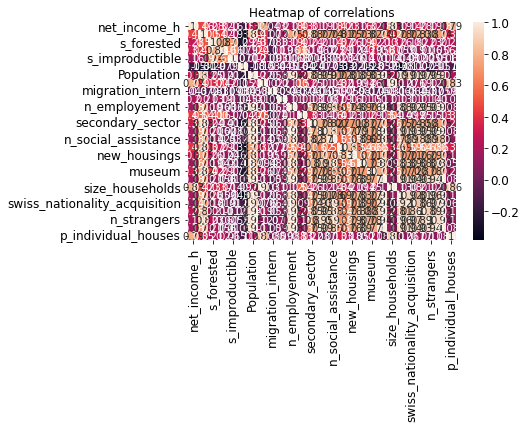

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (20,60)
plt.show()


Principal component Analysis => cf code in R

##Number of clusters

Silhouette score

set up to do a K-Means analysis

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)
print(stdf_2020)
df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)
df_2020.to_csv('data_standardized', index = False, sep='\t')
df_2020.shape

[[-0.27771726 -0.44990516 -0.43548612 ... -0.20788425 -0.10526079
  -0.62609396]
 [-0.17919985 -0.38463783 -0.48449155 ... -0.10871949 -0.09842
  -0.58237077]
 [-0.6683465  -0.50497446 -0.39245697 ... -0.24141822 -0.1668279
  -0.56647482]
 ...
 [-0.27482584  0.05183739  0.46244861 ... -0.22704652 -0.14288514
   0.70804065]
 [-0.27482584  0.05183739  0.46244861 ... -0.22704652 -0.14288514
   0.70804065]
 [-1.0327835  -0.32752892 -0.08079443 ... -0.24333445 -0.18392987
  -0.61884681]]
            0         1         2         3         4         5         6   \
0    -0.277717 -0.449905 -0.435486 -0.457633 -0.212485 -0.018479 -0.270019   
1    -0.179200 -0.384638 -0.484492 -0.536120 -0.214800  0.309255 -0.105673   
2    -0.668347 -0.504974 -0.392457 -0.412239 -0.219585  0.152512 -0.319922   
3    -0.113251 -0.341806 -0.491364 -0.534363 -0.219122  0.095515 -0.058185   
4     0.574680  0.011045 -0.418753 -0.528213 -0.219585 -0.061227  0.298275   
...        ...       ...       ...       ...

(2075, 27)

Determination of the parameters and the number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

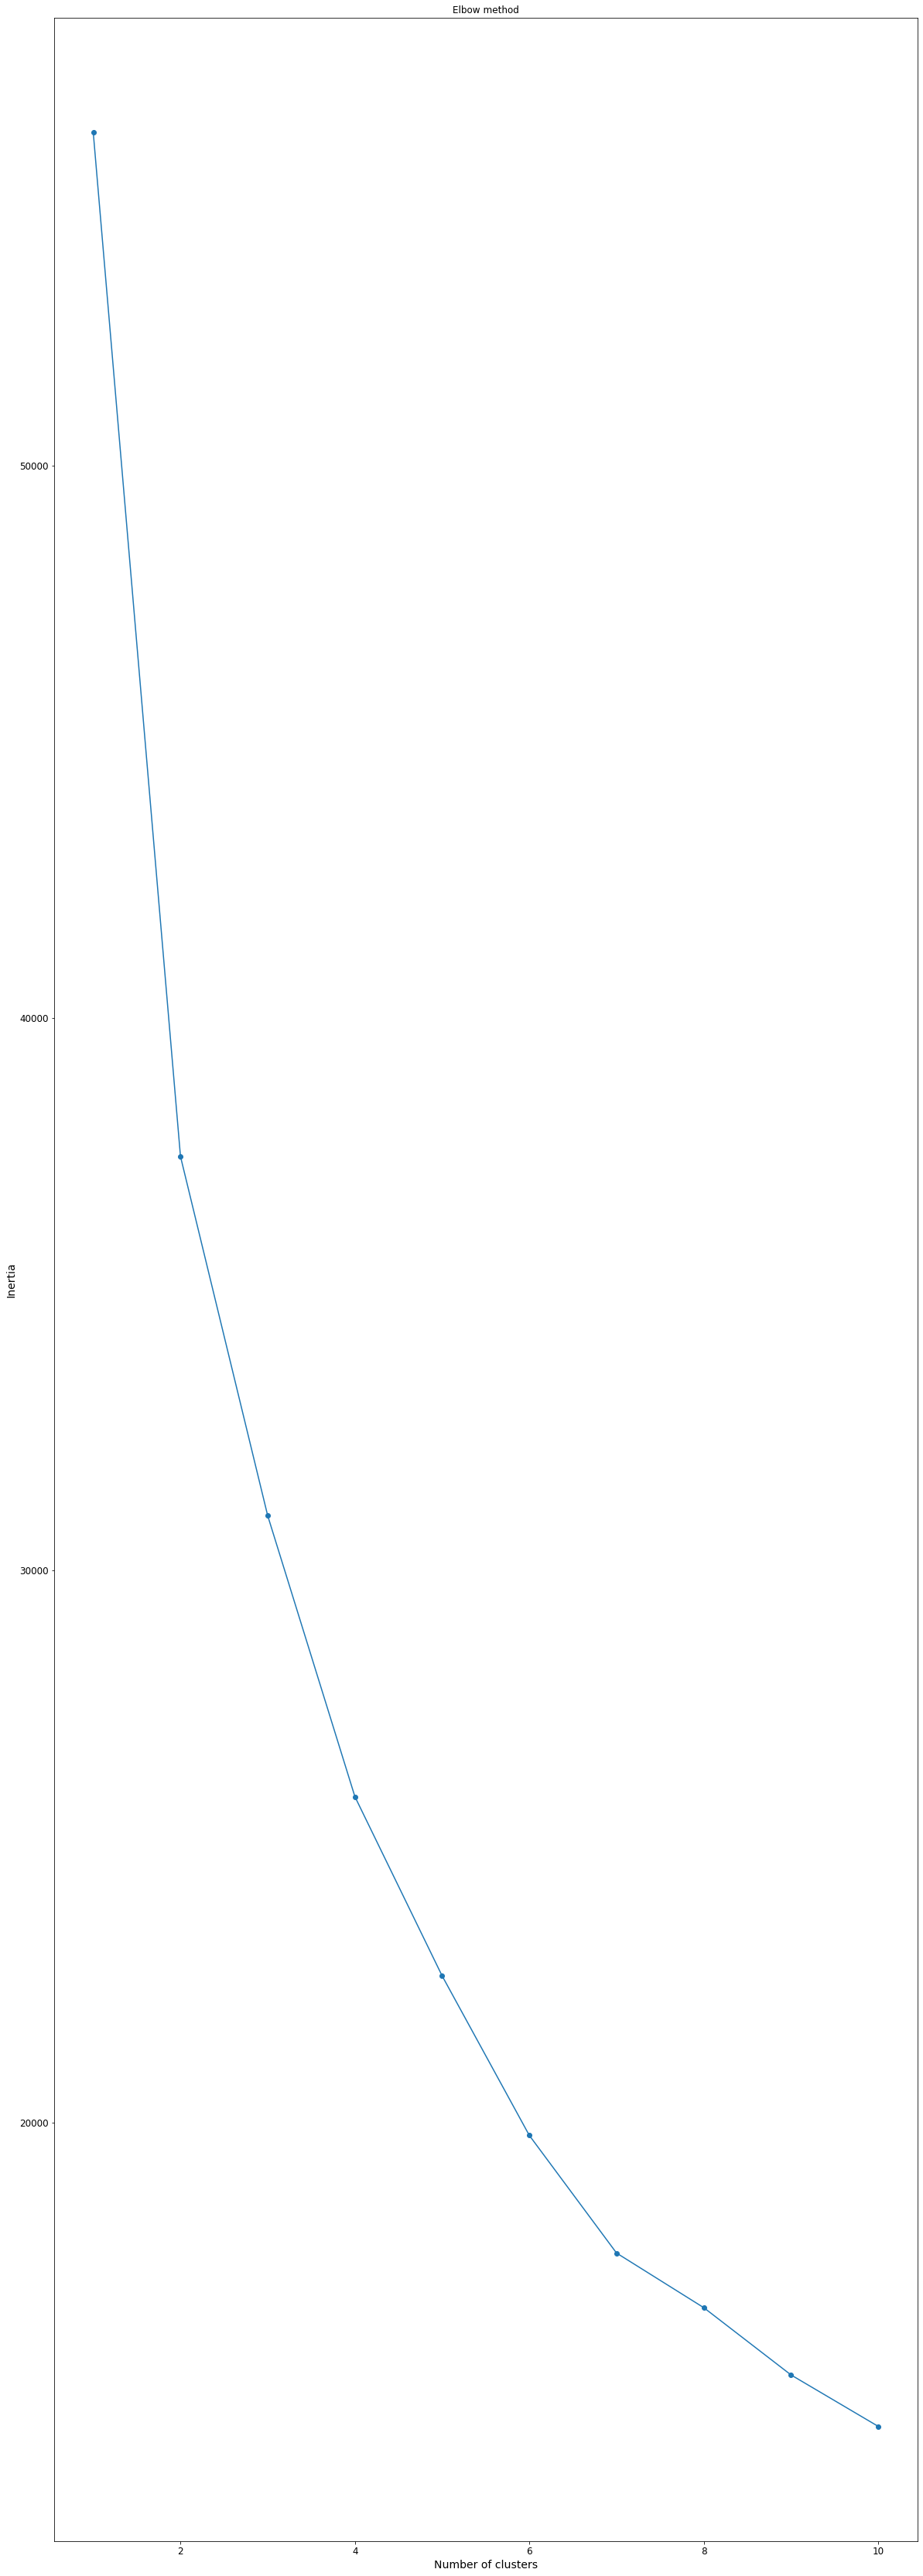

In [12]:
from sklearn.cluster import KMeans


inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stdf_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(stdf_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(stdf_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[0.8620806904471248,
 0.5187002878898082,
 0.3370709023406769,
 0.2805748080341226,
 0.2793329104620787,
 0.29342482195182285,
 0.28745659137658464,
 0.2571166178336078]

In [14]:
num_clusters
Ncluster = range(2,10)
Ncluster
silhouette_ann

[0.8620806904471248,
 0.5187002878898082,
 0.3370709023406769,
 0.2805748080341226,
 0.2793329104620787,
 0.29342482195182285,
 0.28745659137658464,
 0.2571166178336078]

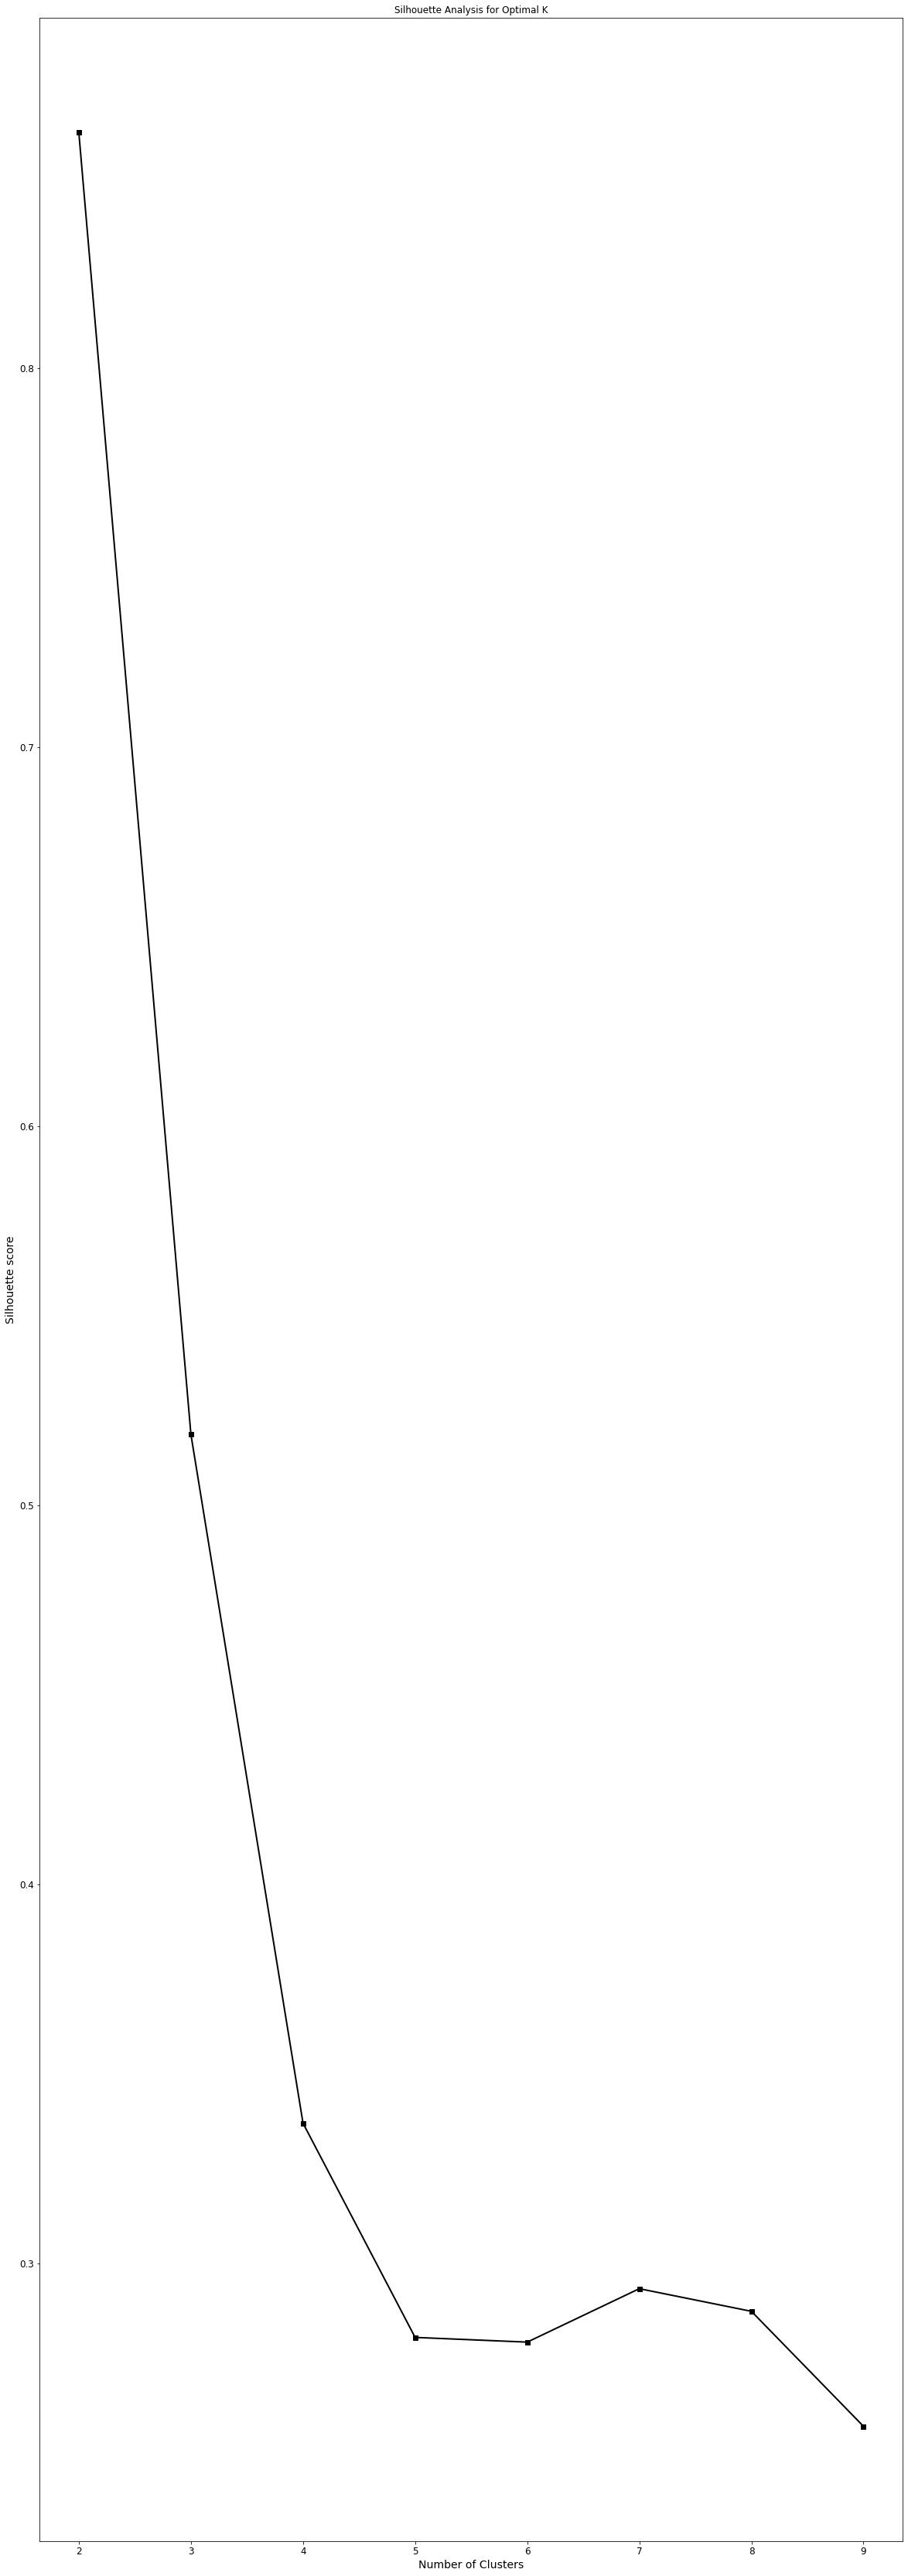

In [15]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [16]:
df_2020 = pd.DataFrame(df_2020)

In [17]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.277717,-0.449905,-0.435486,-0.457633,-0.212485,-0.018479,-0.270019,-0.977108,0.142185,-0.219124,...,-0.171953,0.285332,-0.105261,-0.910903,-0.133943,-0.114107,-0.288458,-0.207884,-0.105261,-0.626094
1,-0.179200,-0.384638,-0.484492,-0.536120,-0.214800,0.309255,-0.105673,-0.764422,-0.185848,-0.289654,...,-0.171953,-0.344858,-0.098420,-0.862656,-0.127927,0.096120,-0.015494,-0.108719,-0.098420,-0.582371
2,-0.668347,-0.504974,-0.392457,-0.412239,-0.219585,0.152512,-0.319922,-0.883304,0.605487,-0.248292,...,-0.171953,-0.344858,-0.166828,-0.816139,-0.170044,-0.186878,-0.312194,-0.241418,-0.166828,-0.566475
3,-0.113251,-0.341806,-0.491364,-0.534363,-0.219122,0.095515,-0.058185,-0.874457,-0.166639,-0.161332,...,-0.171953,-0.029763,0.011033,-0.894469,-0.007591,0.088034,-0.122306,-0.041332,0.011033,-0.809617
4,0.574680,0.011045,-0.418753,-0.528213,-0.219585,-0.061227,0.298275,-0.777007,0.206178,-0.102045,...,-0.171953,-0.029763,0.312027,-0.958455,0.275197,0.670200,0.233734,0.314447,0.312027,-1.076423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,-1.043350,-0.303054,-0.182092,-0.275471,-0.217424,-0.146723,-0.308905,-0.603437,-0.266533,0.509178,...,-0.171953,-0.344858,-0.183930,-0.920321,-0.194111,-0.146449,-0.335930,-0.235670,-0.183930,-0.516499
2071,-1.023505,-0.184757,0.446313,0.208048,-0.207391,-0.103975,-0.307798,-0.781009,0.103192,-0.512488,...,-0.171953,-0.344858,-0.163408,-0.996327,-0.164027,-0.186878,-0.300326,-0.239342,-0.163408,-0.771322
2072,-0.274826,0.051837,0.462449,0.768591,-0.218968,-0.046978,-0.261065,0.310693,0.378337,-0.103939,...,-0.171953,-0.344858,-0.142885,-0.103481,-0.145977,-0.194963,-0.276590,-0.227047,-0.142885,0.708041
2073,-0.274826,0.051837,0.462449,0.768591,-0.218968,-0.046978,-0.261065,0.310693,0.378337,-0.103939,...,-0.171953,-0.344858,-0.142885,-0.103481,-0.145977,-0.194963,-0.276590,-0.227047,-0.142885,0.708041


Implement a weighted K-means


In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_2020)
print(kmeans)

y_kmean = kmeans.predict(df_2020)
df_2020['cluster']= y_kmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)


In [19]:
df_2020['cluster']

0       3
1       3
2       3
3       3
4       3
       ..
2070    3
2071    3
2072    0
2073    0
2074    3
Name: cluster, Length: 2075, dtype: int32

In [20]:
kmeans = KMeans(n_clusters=5)
weights = weights_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight=weights)
print(kmeans)
y_kmean = kmeans.predict(df_2020)
df_2020['cluster']= y_kmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)


In [21]:
df_2020['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
2070    2
2071    2
2072    2
2073    2
2074    2
Name: cluster, Length: 2075, dtype: int32

In [28]:
df_2020.to_csv('data_kmeansweighted', index = False, sep='\t')

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
     ]
)

In [23]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=5,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [24]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [25]:
pipe.fit(df_2020)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [26]:
preprocessed_data = pipe["preprocessor"].transform(df_2020)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)


0.567532953663043

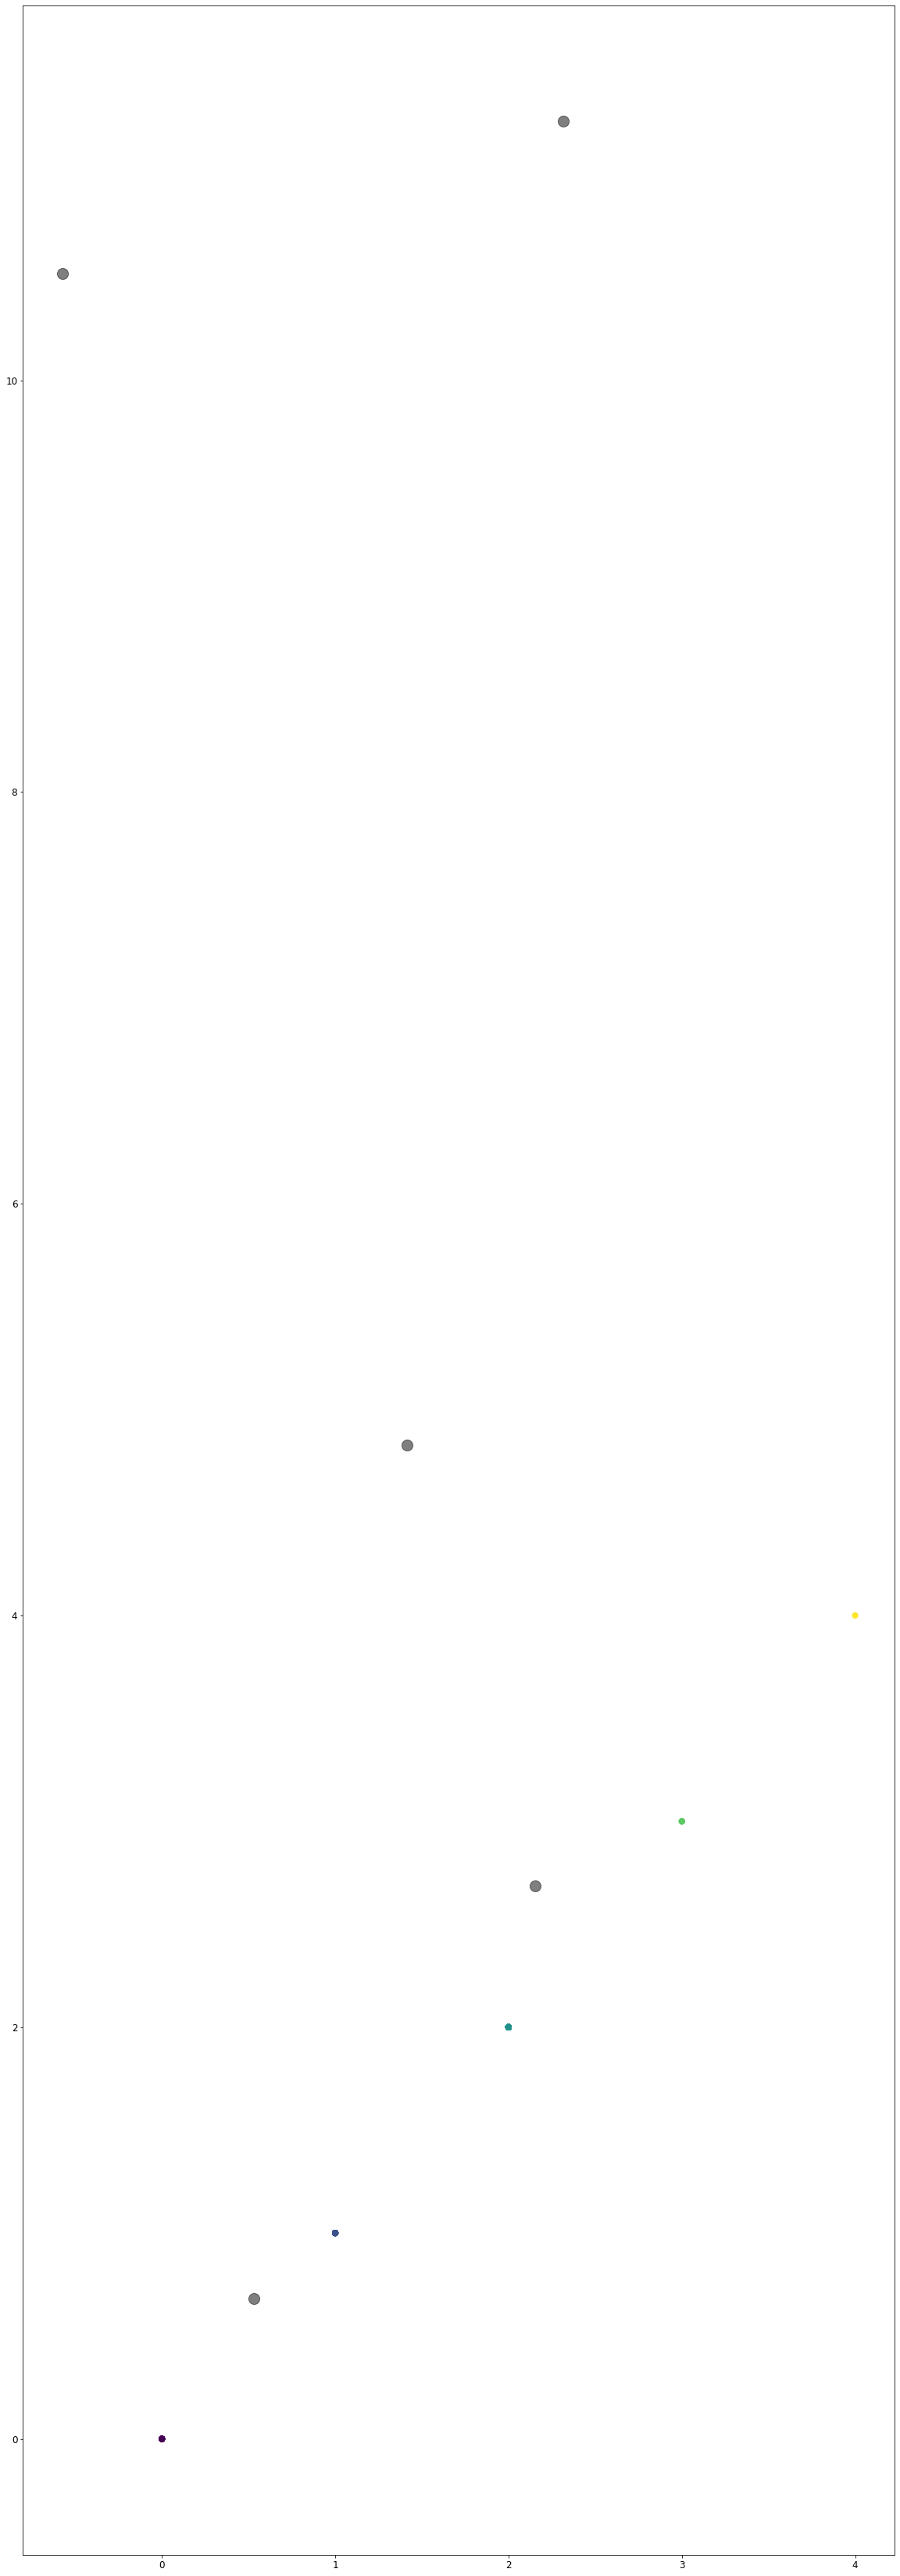

In [30]:
plt.scatter(df_2020['cluster'], df_2020['cluster'], c=y_kmean, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Self-Organizing Map algorithm

The analysis of the Self-Organizing Map algorithm has been done with R with the help of the code of Marj Tonini. Following his request, I won't make this code public. Thus, I will present the different steps and do not hesitate to write me if additional information is needed.

1. Load the library 'kohonen'.
2. Set up the model (defining the grid of the som, convert the data into a matrix.
3. Apply the som algorithm. 
4. Plot the heatmaps with the type "property" of the som.
5. Assign a number to each cluster. 
6. Describe the data repartition into each clusters